几何布朗运动$S(t)$满足方程：$dS(t)=\mu S(t) dt + \sigma S(t) dW(t)$，$S(0)=S_0$

解析解：$S(t)=S_0 exp\{(\mu - \frac{1}{2}\sigma^2)t + \sigma W(t)\}$

模拟数值解：$S_{i+1} = S_{i} + \mu S_{i} \Delta t + \sigma S_{i} \sqrt{\Delta t} Z$，其中$Z$服从$N(0,1)$

给定$\mu=0.05,\sigma=1,S_0=1$

在选定区间$[0,1]$上模拟数值解并与真实解对比。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 创建一个数组储存我们的S，也可以将横纵坐标放在不同的数组中，曲线模拟的效果是相同的
def S(mu=0.05,sigma=1,s0=1,num=1000,long=1) :
    np.random.seed(666) # 给定一个随机种子，使每次模拟生成的随机数相同
    dt = long/num
    S = np.zeros((3,num))
    S[0] = np.linspace(0,long,num)
    S[(1,0)] = S[(2,0)] = s0
    dWt = np.sqrt(dt)*np.random.randn(num) 
    Wt = np.cumsum(dWt)
    S[2] = s0*np.exp((mu - 0.5*sigma**2)*S[0]+sigma*Wt) # 真实解
    for i in range(0,num-1):
        S[(1,i+1)] = S[(1,i)] + mu*S[(1,i)]*dt + sigma*S[(1,i)]*dWt[i] # 数值解
    return S 

In [3]:
# 写一个绘图函数，便于配置图像属性
def pict(n=1000) :
    # 配置画布
    fig = plt.figure(num=1, figsize=(10, 6.18),dpi=100)
    fig.suptitle('Geometric Brownian Motion')
    plt.xlabel('t')
    plt.ylabel('S(t)')
    plt.plot(S(num=n)[0],S(num=n)[1],'rx',label='Sim',linewidth=1)
    plt.plot(S(num=n)[0],S(num=n)[2],'b',label='True',linewidth=1)
    plt.legend()
#     plt.savefig(r'D:\JWE\图片\可视化\几何布朗运动的数值解.png')
    plt.show()

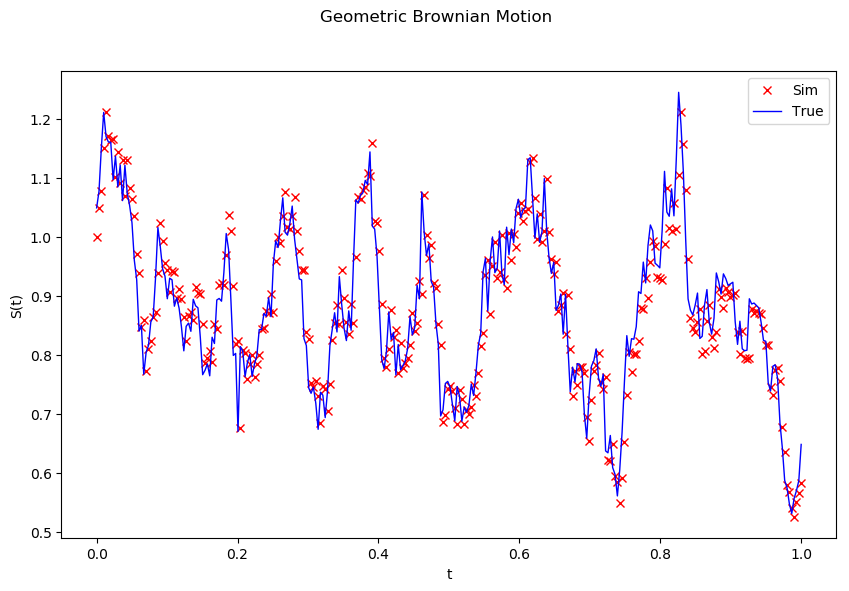

In [4]:
# 函数式编程呈现结果的方式总是简洁的
# 生成300个点进行对比
pict(n=300)